In [110]:
import rosbag
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tf
from scipy.signal import find_peaks

In [111]:
bag = rosbag.Bag('/home/uware/rosbags/static/rotation/21h7/s_yaw_21h7_2m_360_30.bag')

# create variables
target = 'yaw'
true_value = 'true_yaw'

# input values in degrees. the order matters, it will be used for binning 
input_vals = [0,15,30,45,60]

In [112]:
topic = '/tf'

rows = []

for topic, msg, t in bag.read_messages(topics=topic):
    
    time = t

    # conversion to euler
    rotation_quat = msg.transforms[0].transform.rotation
    pitch, yaw, roll = tf.transformations.euler_from_quaternion([rotation_quat.x,rotation_quat.y,rotation_quat.z,rotation_quat.w], axes='rxyz')

    # all rotations
    # rotation_euler = (np.degrees(pitch), np.degrees(yaw), np.degrees(roll))

    # create row
    row={'time': time.to_sec(), target: np.degrees(yaw)}
    rows.append(row)

df = pd.DataFrame.from_records(rows)

In [113]:
# calculate relative time in seconds instead of absolute time
df['relative_time'] =  df.loc[0:, 'time'] - df.at[0, 'time']
df = df.drop(columns=['time'])
df = df[['relative_time', target]]
df

,relative_time,yaw
0,0.000000,38.657762
1,0.115684,32.484853
2,0.238514,21.098502
3,0.367163,17.324147
4,0.494976,-5.224933
...,...,...
1535,77.570452,69.319925
1536,77.614377,70.314097
1537,77.658369,70.521898
1538,89.172130,71.950248


<AxesSubplot:xlabel='relative_time'>

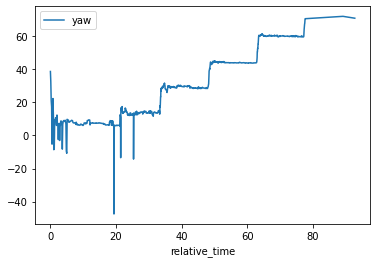

In [114]:
# initial graph
df.plot(x='relative_time', y=target)

In [115]:
# find plateaus
x = df[target]
peaks, _ = find_peaks(x, threshold=(0, 1)) # from find_peaks docs: Threshold: The first element is always interpreted as the minimal and the second, if supplied, as the maximal required threshold.

In [116]:
# the amount of data points we are left with
len(x[peaks])

307

In [117]:
# create filtered data frame
df_filtered_by_targets = df.loc[peaks]

<AxesSubplot:xlabel='relative_time', ylabel='yaw'>

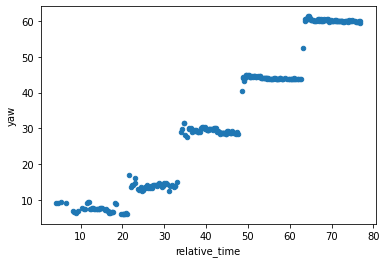

In [118]:
df_filtered_by_targets.plot.scatter(x='relative_time', y=target)

In [119]:
# segmenting/binning by real value
df_filtered_by_targets[true_value] = pd.qcut(df_filtered_by_targets[target], len(input_vals), labels=input_vals, duplicates='drop')

In [120]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_filtered_by_targets)

,relative_time,yaw,true_yaw
31,4.129391,9.047888,0
34,4.504639,9.183697,0
41,5.353382,9.327718,0
50,6.481082,9.191562,0
64,8.264460,6.848162,0
66,8.521593,6.511007,0
69,8.912458,6.264244,0
72,9.281855,6.853244,0
81,10.416054,7.586634,0
84,10.784630,7.408051,0


In [121]:
# calculate the error
df_filtered_by_targets['error'] =  df_filtered_by_targets.apply(lambda row: row[true_value] - row[target], axis=1)

In [122]:
# remove huge errors because theyre actually wrongly binned
df_filtered_by_targets = df_filtered_by_targets.drop(df_filtered_by_targets[df_filtered_by_targets['error'].abs()>9].index)

In [123]:
grouped_df = df_filtered_by_targets.groupby(true_value)

In [124]:
# verify if the bins are in correct order, this is dictated by input_vals order
grouped_df.head(2)

,relative_time,yaw,true_yaw,error
64,8.264460,6.848162,0,-6.848162
66,8.521593,6.511007,0,-6.511007
311,21.603385,16.882202,15,-1.882202
327,22.311607,14.190451,15,0.809549
588,34.174590,29.743404,30,0.256596
597,34.701544,31.383111,30,-1.383111
907,48.815037,44.354607,45,0.645393
910,48.947992,44.074829,45,0.925171
1232,63.593917,60.554126,60,-0.554126
1234,63.682056,60.051135,60,-0.051135


In [125]:
grouped_df.error.describe()

,count,mean,std,min,25%,50%,75%,max
true_yaw,,,,,,,,
0,38.0,-7.010983,0.663523,-8.878537,-7.532508,-7.257462,-6.395644,-6.025599
15,28.0,0.648117,0.724093,-1.882202,0.414230,0.834858,1.183404,1.309526
30,37.0,0.181154,0.527167,-1.611569,-0.048555,0.256596,0.487153,0.882709
45,47.0,0.553043,1.254605,-7.584041,0.441666,0.795581,1.009492,1.090309
60,62.0,-0.245409,0.302894,-1.326024,-0.317276,-0.152108,-0.051829,0.079838


In [126]:
def box_plotter(column_name):
    fig, axes = plt.subplots(1,len(input_vals))

    for i, val in enumerate(input_vals):
        grouped_df.get_group(val).boxplot(column=column_name, ax=axes.flatten()[i])
        axes.flatten()[i].set_title(val)


    plt.tight_layout()
    plt.show()

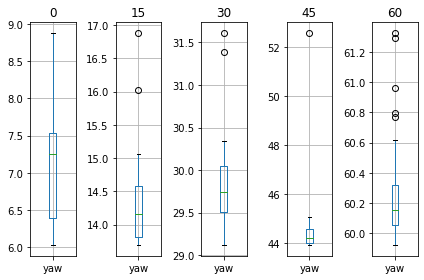

In [127]:
box_plotter(target)

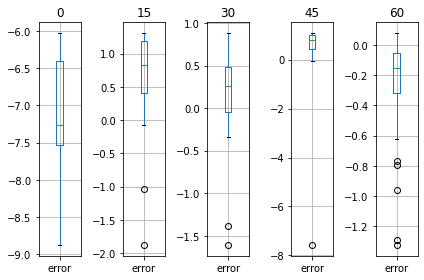

In [128]:
box_plotter('error')